In [19]:
import tensorflow as tf
from utils.architectures import resnet_152
from utils.plot import getAccuracyPlot, getLossPlot

In [20]:
cifar10 = tf.keras.datasets.cifar10 #load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data() #load dataset
y_train = tf.keras.utils.to_categorical(y_train, 10) #create one-hot encoding vectors for 10 classes
y_test = tf.keras.utils.to_categorical(y_test, 10) #create one-hot encoding vectors for 10 classes


datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=25,
                                                          width_shift_range=0.25,
                                                          height_shift_range=0.25,
                                                          horizontal_flip=True,
                                                          validation_split=0.2) #Data Augmentation
X_train = X_train.astype('float32') / 255 #Normalization by 255 as it is a 8 bit image
X_test = X_test.astype('float32') / 255 #Normalization by 255 as it is a 8 bit image

datagen.fit(X_train)  #Applying Data Augmentation to the training dataset

input_shape = X_train.shape[1:]
output_size = 10

In [21]:
model = resnet_152(output_size)

In [22]:
model.compile(tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet152 (Functional)       (None, 2048)              58370944  
_________________________________________________________________
dense_3 (Dense)              (None, 10)                20490     
Total params: 58,391,434
Trainable params: 58,240,010
Non-trainable params: 151,424
_________________________________________________________________


In [24]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=64, subset='training'), validation_data=datagen.flow(X_train, y_train, batch_size=64, subset='validation'),
                    epochs=100)

Epoch 1/100
625/625 [==============================] - 594s 905ms/step - loss: 2.2608 - accuracy: 0.2393 - val_loss: 2.2818 - val_accuracy: 0.1111
Epoch 2/100
625/625 [==============================] - 537s 860ms/step - loss: 2.0145 - accuracy: 0.2827 - val_loss: 1.9628 - val_accuracy: 0.2824
Epoch 3/100
625/625 [==============================] - 574s 919ms/step - loss: 1.8190 - accuracy: 0.3713 - val_loss: 4.4827 - val_accuracy: 0.3139
Epoch 4/100
625/625 [==============================] - 583s 932ms/step - loss: 1.8261 - accuracy: 0.4080 - val_loss: 12.6239 - val_accuracy: 0.3732
Epoch 5/100
625/625 [==============================] - 426s 680ms/step - loss: 1.6374 - accuracy: 0.4580 - val_loss: 1.5093 - val_accuracy: 0.4482
Epoch 6/100
625/625 [==============================] - 352s 563ms/step - loss: 1.5760 - accuracy: 0.5030 - val_loss: 5.3844 - val_accuracy: 0.4842
Epoch 7/100
625/625 [==============================] - 361s 577ms/step - loss: 1.4733 - accuracy: 0.5272 - val_loss: 

625/625 [==============================] - 461s 738ms/step - loss: 0.7506 - accuracy: 0.7432 - val_loss: 0.8520 - val_accuracy: 0.7150
Epoch 57/100
625/625 [==============================] - 436s 697ms/step - loss: 0.7332 - accuracy: 0.7469 - val_loss: 1.1091 - val_accuracy: 0.6295
Epoch 58/100
625/625 [==============================] - 412s 659ms/step - loss: 0.7244 - accuracy: 0.7505 - val_loss: 0.9343 - val_accuracy: 0.6774
Epoch 59/100
625/625 [==============================] - 386s 617ms/step - loss: 0.7124 - accuracy: 0.7540 - val_loss: 1.0699 - val_accuracy: 0.6501
Epoch 60/100
625/625 [==============================] - 440s 704ms/step - loss: 0.7619 - accuracy: 0.7370 - val_loss: 0.7757 - val_accuracy: 0.7334
Epoch 61/100
625/625 [==============================] - 539s 862ms/step - loss: 0.6760 - accuracy: 0.7642 - val_loss: 0.8322 - val_accuracy: 0.7140
Epoch 62/100
625/625 [==============================] - 772s 1s/step - loss: 0.6662 - accuracy: 0.7681 - val_loss: 0.8040 - v

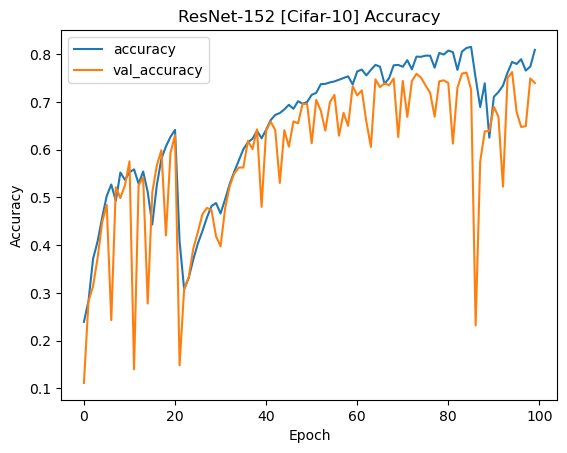

In [25]:
getAccuracyPlot(history, 'ResNet-152 [Cifar-10]')

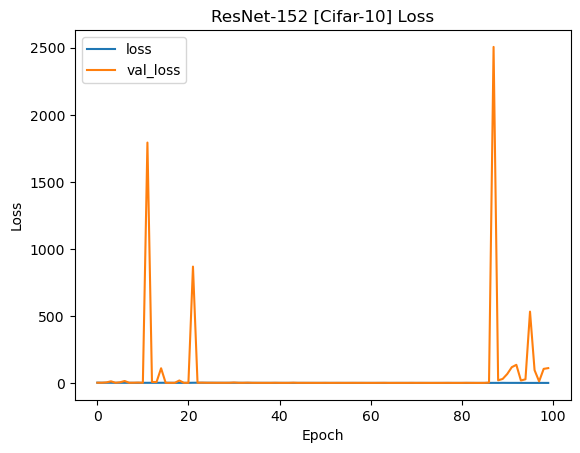

In [26]:
getLossPlot(history, 'ResNet-152 [Cifar-10]')

In [27]:
model.save('cifar10_resnet152_epoch200.h5')

/Users/yashjain/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '
